# Result Analysis

## import libraries

In [7]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# constant
model_names = ["Linear Regression", "Decision Tree", "XGBoost", "CatBoost", "Neural Network", "Bert+NN", "Bert+DNN", "Bert+ResNet"]

## Calculate Metrics for different models

In [29]:
# define the functions to calculate metrics
def get_rg_errors(validation: np.array) -> np.array:
    # call regression metrics for each mmp
    pred = validation[0, :, :]
    true = validation[1, :, :]
    mse = np.zeros((18))
    mae = np.zeros((18))
    rmse = np.zeros((18))
    for mmp_i in range(18):
        mse[mmp_i] = mean_squared_error(true[:, mmp_i], pred[:, mmp_i])
        mae[mmp_i] = mean_absolute_error(true[:, mmp_i], pred[:, mmp_i])
        rmse[mmp_i] = np.sqrt(mse[mmp_i])
    rg_error = np.stack([mse, mae, rmse], axis=1)
    return rg_error


def get_cl_errors(validation: np.array, threshold: int = 1.65) -> np.array:
    # call classification metrics for each mmp
    pred = validation[0, :, :] > threshold  # set label to 1 if the probability is larger than threshold
    true = validation[1, :, :] > 1.65
    p_score = np.zeros((18))
    r_score = np.zeros((18))
    f_score = np.zeros((18))
    auc_score = np.zeros((18))
    a_score = np.zeros((18))
    for mmp_i in range(18):
        p_score[mmp_i] = precision_score(true[:, mmp_i], pred[:, mmp_i])
        r_score[mmp_i] = recall_score(true[:, mmp_i], pred[:, mmp_i])
        f_score[mmp_i] = f1_score(true[:, mmp_i], pred[:, mmp_i])
        auc_score[mmp_i] = roc_auc_score(true[:, mmp_i], pred[:, mmp_i])
        a_score[mmp_i] = accuracy_score(true[:, mmp_i], pred[:, mmp_i])
    cl_error = np.stack([auc_score, f_score, p_score, r_score, a_score], axis=1)
    return cl_error

In [3]:
# load validation results
lr_validation = np.load("./Result/lr_validation.npy")
dtr_validation = np.load("./Result/dtr_validation.npy")
xgb_validation = np.load("./Result/xgb_validation.npy")
cat_validation = np.load("./Result/cat_validation.npy")

nn_validation = np.load("./Result/nn_validation.npy")
bionn_validation = np.load("./Result/BioNN_validation.npy")[-1]
biodnn_validation = np.load("./Result/biodnn_validation.npy")[-1]
biores_validation = np.load("./Result/biores_validation.npy")[-1]

In [4]:
# calculate regression metrics
lr_rg_error = get_rg_errors(lr_validation).mean(axis=0)
dtr_rg_error = get_rg_errors(dtr_validation).mean(axis=0)
xgb_rg_error = get_rg_errors(xgb_validation).mean(axis=0)
cat_rg_error = get_rg_errors(cat_validation).mean(axis=0)
nn_rg_error = get_rg_errors(nn_validation).mean(axis=0)
bionn_rg_error = get_rg_errors(bionn_validation).mean(axis=0)
biodnn_rg_error = get_rg_errors(biodnn_validation).mean(axis=0)
biores_rg_error = get_rg_errors(biores_validation).mean(axis=0)

mmp_other_rg_error = np.stack([lr_rg_error, dtr_rg_error, xgb_rg_error, cat_rg_error, nn_rg_error, bionn_rg_error, biodnn_rg_error, biores_rg_error])
mmp_other_rg_error = pd.DataFrame(mmp_other_rg_error, index=model_names, columns=["mse", "mae", "rmse"])
mmp_other_rg_error.round(3)

,mse,mae,rmse
Linear Regression,0.533,0.569,0.728
Decision Tree,0.688,0.636,0.828
XGBoost,0.534,0.565,0.727
CatBoost,0.463,0.526,0.677
Neural Network,0.468,0.529,0.680
Bert+NN,0.466,0.528,0.679
Bert+DNN,0.487,0.539,0.694
Bert+ResNet,0.575,0.590,0.756


In [37]:
# calculate classification metrics (threshold = 2)
# this threshold leads to a high precision, which is used to select models for MMP3 and MMP9 (make sure that the selected samples are really positive)
# you may find there are some warnings, this is caused by the high threshold leads to most peptides are classified to 0, which makes the calculation of precision throw warnings. We check the result, and the warning mmps are MMP7 and MMP17, which are dropped in the following analysis (we only analyze mmp3 and mmp9 here), so we can ignore the warnings.
threshold = 2
lr_cl_error = get_cl_errors(lr_validation, threshold)[(2, 5), :].mean(axis=0)
dtr_cl_error = get_cl_errors(dtr_validation, threshold)[(2, 5), :].mean(axis=0)
xgb_cl_error = get_cl_errors(xgb_validation, threshold)[(2, 5), :].mean(axis=0)
cat_cl_error = get_cl_errors(cat_validation, threshold)[(2, 5), :].mean(axis=0)
nn_cl_error = get_cl_errors(nn_validation, threshold)[(2, 5), :].mean(axis=0)
bionn_cl_error = get_cl_errors(bionn_validation, threshold)[(2, 5), :].mean(axis=0)
biodnn_cl_error = get_cl_errors(biodnn_validation, threshold)[(2, 5), :].mean(axis=0)
biores_cl_error = get_cl_errors(biores_validation, threshold)[(2, 5), :].mean(axis=0)

all_cl_error = np.stack([lr_cl_error, dtr_cl_error, xgb_cl_error, cat_cl_error, nn_cl_error, bionn_cl_error, biodnn_cl_error, biores_cl_error])
all_cl_error = pd.DataFrame(all_cl_error, index=model_names, columns=["AUC", "F1", "Precision", "Recall", "Accuracy"])
all_cl_error.round(3)

C:\Users\Hongyi LAN\anaconda3\envs\dsl_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hongyi LAN\anaconda3\envs\dsl_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hongyi LAN\anaconda3\envs\dsl_project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

,AUC,F1,Precision,Recall,Accuracy
Linear Regression,0.517,0.068,0.783,0.036,0.945
Decision Tree,0.531,0.116,0.418,0.067,0.942
XGBoost,0.545,0.164,0.680,0.094,0.946
CatBoost,0.541,0.150,0.797,0.083,0.947
Neural Network,0.526,0.099,0.822,0.053,0.946
Bert+NN,0.517,0.065,0.837,0.034,0.945
Bert+DNN,0.522,0.082,0.804,0.044,0.945
Bert+ResNet,0.567,0.209,0.614,0.140,0.945


In [6]:
# calculate classification metrics (threshold = 2)
# this threshold lead to a high recall, which is used to select models for MMPs except for MMP3 and MMP9 (make sure that the model can detect the positive samples)
threshold = 0
lr_cl_error = get_cl_errors(lr_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
dtr_cl_error = get_cl_errors(dtr_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
xgb_cl_error = get_cl_errors(xgb_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
cat_cl_error = get_cl_errors(cat_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
nn_cl_error = get_cl_errors(nn_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
bionn_cl_error = get_cl_errors(bionn_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
biodnn_cl_error = get_cl_errors(biodnn_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)
biores_cl_error = get_cl_errors(biores_validation, threshold)[list(set(range(18)) - {2, 5}), :].mean(axis=0)

all_cl_error = np.stack([lr_cl_error, dtr_cl_error, xgb_cl_error, cat_cl_error, nn_cl_error, bionn_cl_error, biodnn_cl_error, biores_cl_error])
all_cl_error = pd.DataFrame(all_cl_error, index=model_names, columns=["AUC", "F1", "Precision", "Recall", "Accuracy"])
all_cl_error.round(3)

,AUC,F1,Precision,Recall,Accuracy
Linear Regression,0.766,0.234,0.134,0.963,0.593
Decision Tree,0.758,0.243,0.142,0.911,0.623
XGBoost,0.776,0.247,0.144,0.955,0.619
CatBoost,0.785,0.252,0.147,0.968,0.624
Neural Network,0.811,0.288,0.173,0.957,0.683
Bert+NN,0.775,0.240,0.139,0.973,0.602
Bert+DNN,0.781,0.247,0.143,0.971,0.614
Bert+ResNet,0.788,0.257,0.150,0.965,0.632


## Calibration

In [11]:
# extract the prediction
biores_pred = biores_validation[0, :, :]
bionn_pred = bionn_validation[0, :, :]
biodnn_pred = biodnn_validation[0, :, :]
nn_pred = nn_validation[0, :, :]
cat_pred = cat_validation[0, :, :]

C:\Users\Hongyi LAN\anaconda3\envs\dsl_project\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hongyi LAN\anaconda3\envs\dsl_project\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hongyi LAN\AppData\Local\Temp\ipykernel_47616\132502819.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


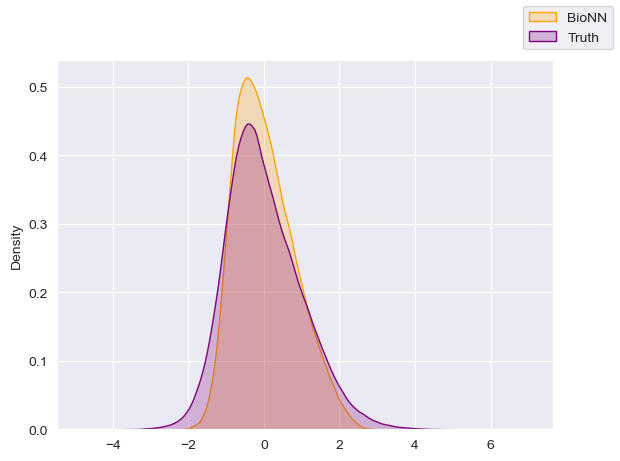

In [36]:
# compare the distribution of truth and prediction by different models
biores_pred_all = biores_pred.flatten()
bionn_pred_all = bionn_pred.flatten()
biodnn_pred_all = biodnn_pred.flatten()
cat_pred_all = cat_pred.flatten()
nn_pred_all = nn_pred.flatten()
true_all = biores_validation[1, :, :].flatten()

fig, ax = plt.subplots(1, 1)
# sns.kdeplot(biores_pred_all, fill=True, ax=ax, color="blue", label="BioRes")
sns.kdeplot(bionn_pred_all, fill=True, ax=ax, color="orange", label="BioNN")
# sns.kdeplot(biodnn_pred_all, fill=True, ax=ax, color="green", label="BioDNN")
# sns.kdeplot(cat_pred_all, fill=True, ax=ax, color="pink", label="CatBoost")
# sns.kdeplot(nn_pred_all, fill=True, ax=ax, color="yellow", label="NN")
sns.kdeplot(true_all, fill=True, ax=ax, color="purple", label="Truth")
fig.legend()
fig.show()